 # 單品牌自訂關鍵字分析（電影）

In [38]:
import pandas as pd

 ## 資料清理與合併

 匯入原始爬蟲資料

In [39]:
KoreaDrama = pd.read_csv("dataset/KoreaDrama_re.csv")

 將重複與空白訊息去除

In [40]:
KoreaDrama.drop_duplicates()
KoreaDrama.dropna(inplace=True)

 資料欄位整合

In [41]:
KoreaDrama["所有文"] = KoreaDrama["標題"] + KoreaDrama["內容"]

 找出符合條件的資料，再資料欄位整合，所有文字變成一個大字串

In [42]:
KoreaDrama_selected = KoreaDrama[KoreaDrama["所有文"].str.contains("成為王的男人")]
theSTR = str(KoreaDrama_selected["所有文"].sum())

 資料清理，無意義字元去除

In [43]:
removeword = [
    "span",
    "class",
    "f3",
    "https",
    "imgur",
    "h1",
    "_   blank",
    "href",
    "rel",
    "nofollow",
    "target",
    "cdn",
    "cgi",
    "b4",
    "jpg",
    "hl",
    "b1",
    "f5",
    "f4",
    "goo.gl",
    "f2",
    "email",
    "map",
    "f1",
    "f6",
    "__cf___",
    "data",
    "bbs",
    "html",
    "cf",
    "f0",
    "b2",
    "b3",
    "b5",
    "b6",
    "原文內容",
    "原文連結",
    "作者",
    "標題",
    "時間",
    "看板",
    "<",
    ">",
    "，",
    "。",
    "？",
    "—",
    "閒聊",
    "・",
    "/",
    " ",
    "=",
    '"',
    "\n",
    "」",
    "「",
    "！",
    "[",
    "]",
    "：",
    "‧",
    "╦",
    "╔",
    "╗",
    "║",
    "╠",
    "╬",
    "╬",
    ":",
    "╰",
    "╩",
    "╯",
    "╭",
    "╮",
    "│",
    "╪",
    "─",
    "《",
    "》",
    "_",
    ".",
    "、",
    "（",
    "）",
    "　",
    "*",
    "※",
    "~",
    "○",
    """, """,
    "～",
    "@",
    "＋",
    "\r",
    "▁",
    ")",
    "(",
    "-",
    "═",
    "?",
    ",",
    "!",
    "…",
    "&",
    ";",
    "『",
    "』",
    "#",
    "＝",
    r"\l",
]

In [44]:
for word in removeword:
    theSTR = theSTR.replace(word, "")

 ## Jieba 將字串斷詞，變成 list

In [45]:
import jieba

In [46]:
# jieba 切詞
jieba.set_dictionary("dict/dict.txt.big")
wordslist = jieba.lcut(theSTR, cut_all=False)

Building prefix dict from /Volumes/Dev/nkust/nkust-homework/semester-6/marketing/03-brand-keywords/dict/dict.txt.big ...
Loading model from cache /var/folders/qj/62r8d09n5hn3nm_bdzf0dcpr0000gn/T/jieba.u69ab63bdeec5bf31b091a1c915e3b64e.cache
Loading model cost 0.197 seconds.
Prefix dict has been built successfully.


 去除停用詞

In [47]:
with open("dict/stopwords.txt", "r", encoding="utf-8-sig") as f:
    stops = set(line.strip() for line in f.readlines())

 使用集合而非列表進行過濾，提高效率

In [48]:
words = [word for word in wordslist if word not in stops]

 ## 自訂關鍵字計算

In [49]:
# 關鍵字列表
focus_keywords = ["預告", "中字", "媽媽", "官網", "刑警", "韓國"]

 關鍵字在 jieba 斷詞字串出現的次數

In [50]:
from collections import Counter

words_counter = Counter(words)
focus_keywords_count = {
    keyword: words_counter.get(keyword, 0) for keyword in focus_keywords
}

In [51]:
# 關鍵字與熱度結合成DataFrame
focus_keywords_df = pd.DataFrame(
    {
        "關鍵字": list(focus_keywords_count.keys()),
        "熱度": list(focus_keywords_count.values()),
    }
)

 ## 視覺化自訂關鍵字熱度

In [52]:
import matplotlib.pyplot as plt
import matplotlib_inline

plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]
plt.rcParams["axes.unicode_minus"] = False

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

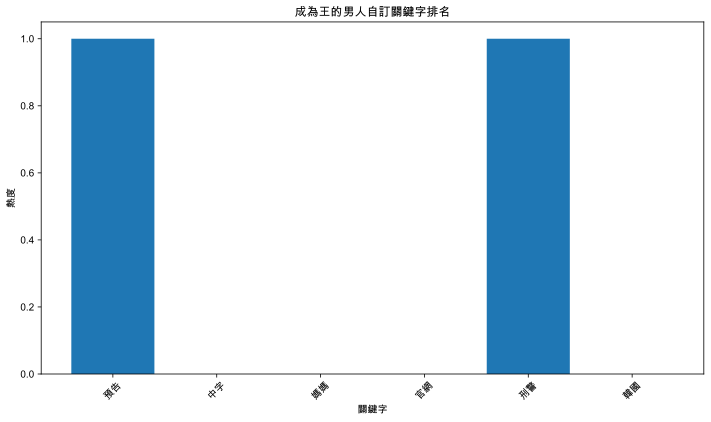

In [53]:
plt.figure(figsize=(10, 6))
plt.bar(focus_keywords_df["關鍵字"], focus_keywords_df["熱度"])
plt.xlabel("關鍵字")
plt.ylabel("熱度")
plt.title("成為王的男人自訂關鍵字排名")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 ## Question: 單品牌自訂關鍵字分析



 1. 請匯入檔案 `PTT_運動內衣_所有資料1000.csv`，並計算 'Decathlon' 品牌，自訂關鍵字熱度，並畫圖



 自訂關鍵字：`focus_keyword=['健身','跑步','高強度','無鋼圈','瑜珈','舒適']`



 hint: 'Decathlon' 有多種表示法，請先統一：'decathlon', 'DECATHLON', '迪卡農', '迪卡儂'

In [54]:
import re
import pandas as pd

In [55]:
# 匯入運動內衣資料
ptt_fitness_df = pd.read_csv("dataset/PTT_運動內衣_所有資料1000.csv")
ptt_fitness_df["content"] = ptt_fitness_df["內文"] + ptt_fitness_df["留言"]

In [56]:
# Decathlon 的各種表示法
decathlon_patterns = ["decathlon", "DECATHLON", "迪卡農", "迪卡儂"]

# 篩選 Decathlon 相關內容
decathlon_mask = ptt_fitness_df["content"].apply(
    lambda x: any(
        re.search(pattern, x, re.IGNORECASE) for pattern in decathlon_patterns
    )
)
decathlon_df = ptt_fitness_df[decathlon_mask]

In [57]:
# 將所有文字合併成一個字串
decathlon_text = " ".join(decathlon_df["content"])

In [58]:
# 移除無意義字元
for word in removeword:
    decathlon_text = decathlon_text.replace(word, "")

In [59]:
# Jieba 斷詞
jieba.set_dictionary("dict/dict.txt.big")
decathlon_words_list = jieba.lcut(decathlon_text, cut_all=False)

Building prefix dict from /Volumes/Dev/nkust/nkust-homework/semester-6/marketing/03-brand-keywords/dict/dict.txt.big ...
Loading model from cache /var/folders/qj/62r8d09n5hn3nm_bdzf0dcpr0000gn/T/jieba.u69ab63bdeec5bf31b091a1c915e3b64e.cache
Loading model cost 0.175 seconds.
Prefix dict has been built successfully.


In [60]:
# 去除停用詞
decathlon_words = [word for word in decathlon_words_list if word not in stops]

In [61]:
# 自訂關鍵字列表
focus_keywords = ["健身", "跑步", "高強度", "無鋼圈", "瑜珈", "舒適"]

In [62]:
# 計算關鍵字出現次數
decathlon_words_counter = Counter(decathlon_words)
decathlon_keywords_count = {
    keyword: decathlon_words_counter.get(keyword, 0) for keyword in focus_keywords
}

In [63]:
# 轉換成 DataFrame
decathlon_keywords_df = pd.DataFrame(
    {
        "關鍵字": list(decathlon_keywords_count.keys()),
        "熱度": list(decathlon_keywords_count.values()),
    }
)

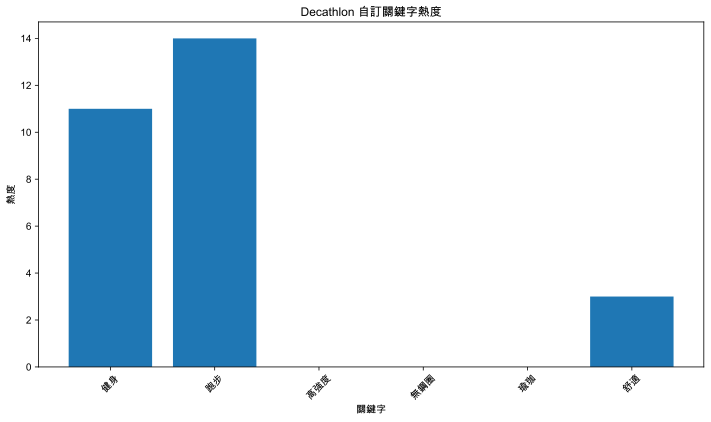

In [64]:
# 視覺化
plt.figure(figsize=(10, 6))
plt.bar(decathlon_keywords_df["關鍵字"], decathlon_keywords_df["熱度"])
plt.xlabel("關鍵字")
plt.ylabel("熱度")
plt.title("Decathlon 自訂關鍵字熱度")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 ## Question: 多品牌自訂關鍵字分析



 請匯入檔案 `KoreaDrama_re.csv`，畫出各品牌自訂關鍵字的熱度



 ```python
 movie = ['成為王的男人', '皇后的品格', '赤月青日', '神的測驗', '死之詠讚',
          '加油吧威基基', '皮諾丘', '魔女寶鑑', '男朋友', '來自星星的你']

 focus_keyword = ['預告', '中字', '媽媽', '官網', '刑警', '韓國']
 ```

In [65]:
# 匯入原始資料
KoreaDrama = pd.read_csv("dataset/KoreaDrama_re.csv")
KoreaDrama.drop_duplicates()
KoreaDrama.dropna(inplace=True)
KoreaDrama["所有文"] = KoreaDrama["標題"] + KoreaDrama["內容"]

In [66]:
# 設定電影列表和關鍵字列表
movies = [
    "成為王的男人",
    "皇后的品格",
    "赤月青日",
    "神的測驗",
    "死之詠讚",
    "加油吧威基基",
    "皮諾丘",
    "魔女寶鑑",
    "男朋友",
    "來自星星的你",
]
focus_keywords = ["預告", "中字", "媽媽", "官網", "刑警", "韓國"]

In [67]:
# 創建空的 DataFrame 來存儲各電影的關鍵字熱度
movie_keywords_df = pd.DataFrame(index=focus_keywords)

In [68]:
# 對每部電影進行處理
for movie in movies:
    # 篩選出與該電影相關的內容
    movie_mask = KoreaDrama["所有文"].str.contains(movie)
    movie_content = str(KoreaDrama[movie_mask]["所有文"].sum())

    # 移除無意義字元
    for word in removeword:
        movie_content = movie_content.replace(word, "")

    # Jieba 斷詞
    words_list = jieba.lcut(movie_content, cut_all=False)

    # 去除停用詞
    filtered_words = [word for word in words_list if word not in stops]

    # 計算關鍵字出現次數
    word_counter = Counter(filtered_words)
    keyword_counts = {
        keyword: word_counter.get(keyword, 0) for keyword in focus_keywords
    }

    # 將結果添加到 DataFrame
    movie_keywords_df[movie] = pd.Series(keyword_counts)

In [69]:
# 確保沒有 NaN 值
movie_keywords_df.fillna(0, inplace=True)

In [70]:
# 轉置 DataFrame 使電影名稱成為索引
movie_keywords_df_transposed = movie_keywords_df.T

 ### 為每部電影繪製關鍵字熱度圖

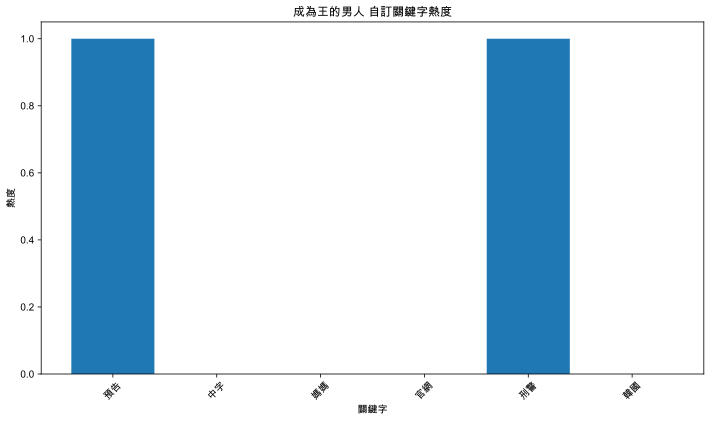

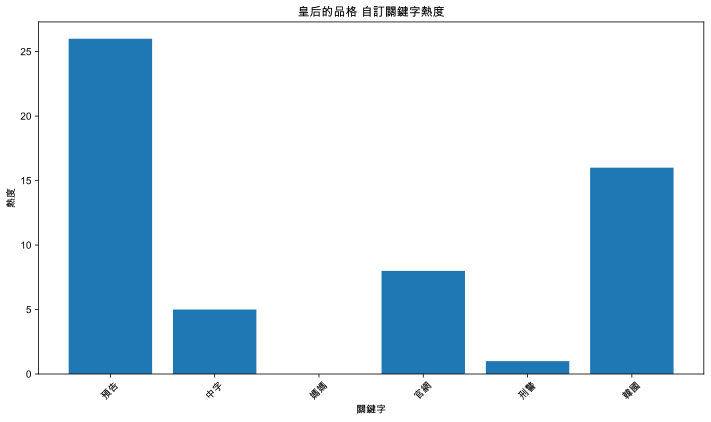

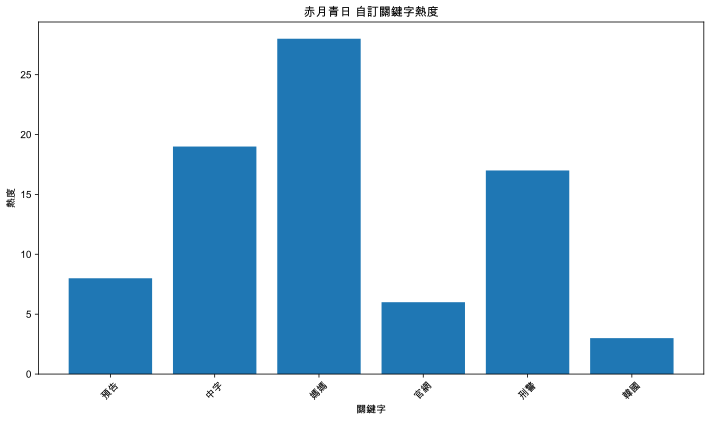

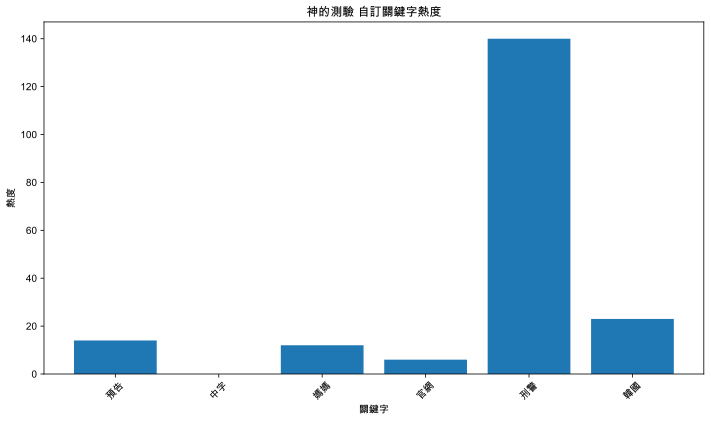

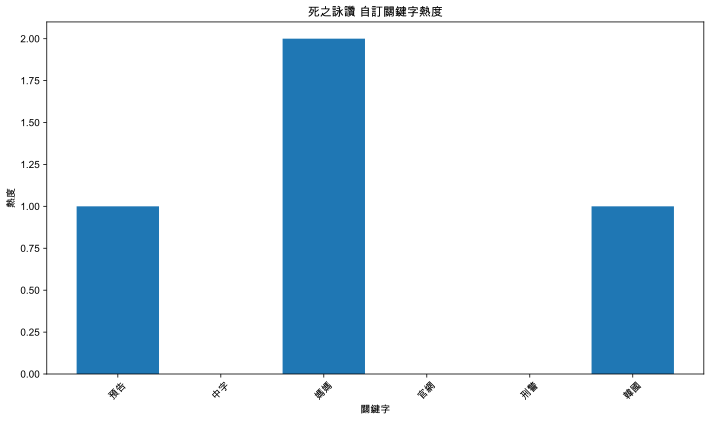

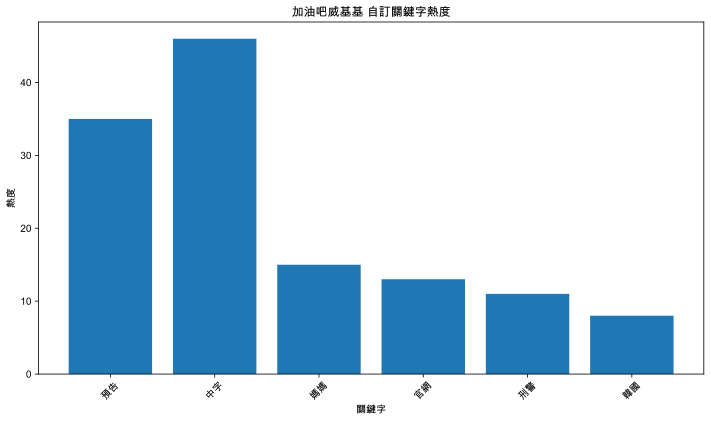

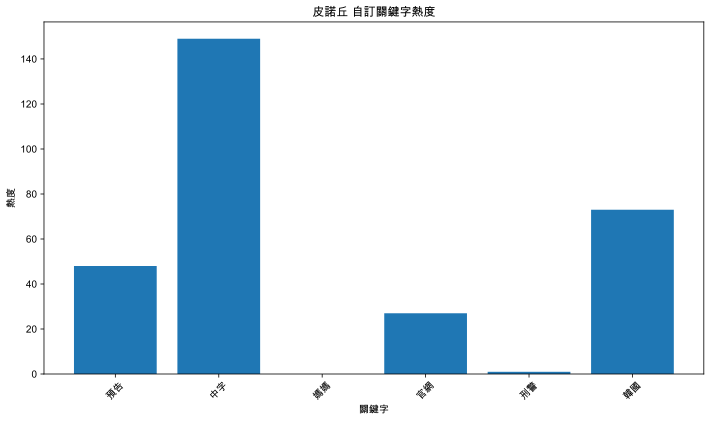

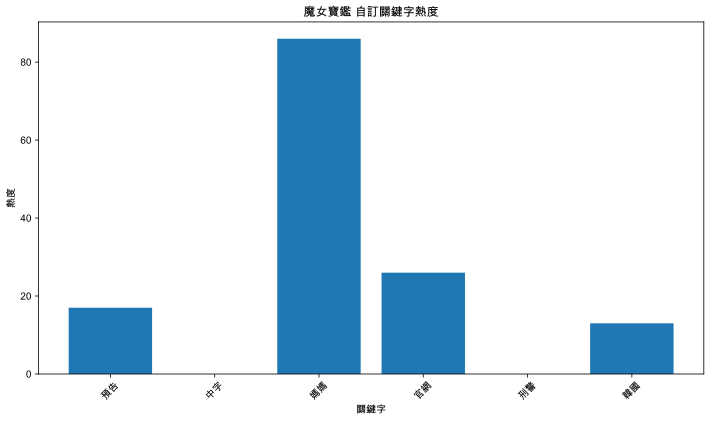

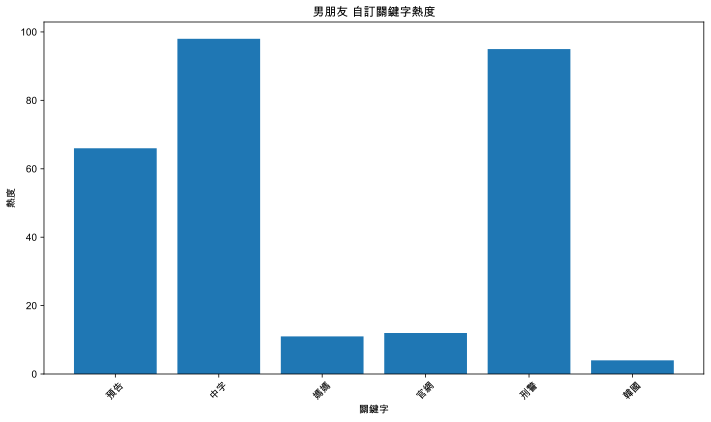

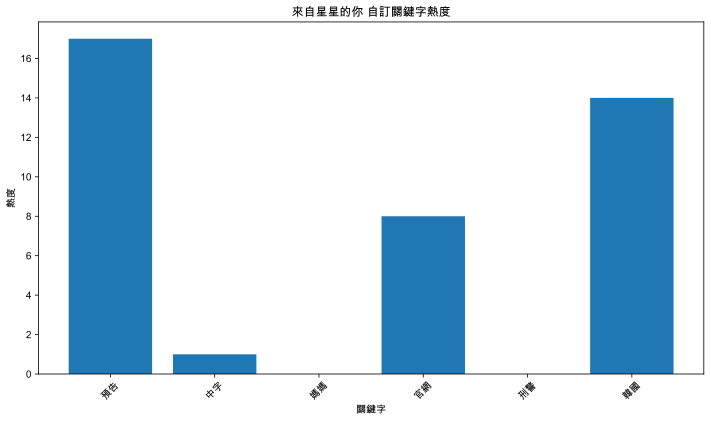

In [71]:
# 繪製每部電影的關鍵字熱度柱狀圖
for movie in movies:
    plt.figure(figsize=(10, 6))
    plt.bar(focus_keywords, movie_keywords_df[movie])
    plt.xlabel("關鍵字")
    plt.ylabel("熱度")
    plt.title(f"{movie} 自訂關鍵字熱度")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

 ## Question: 資料整合與多系列視覺化



 1. 將各品牌(列)與各關鍵字熱度(行)儲存為 `allmovie_keywordscore.csv`

 2. 將各品牌與各關鍵字整合成一張折線圖，X軸為品牌名稱，Y軸為各關鍵字熱度

In [72]:
# 儲存為 CSV 檔案
movie_keywords_df_transposed.to_csv("dataset/allmovie_keywordscore.csv")

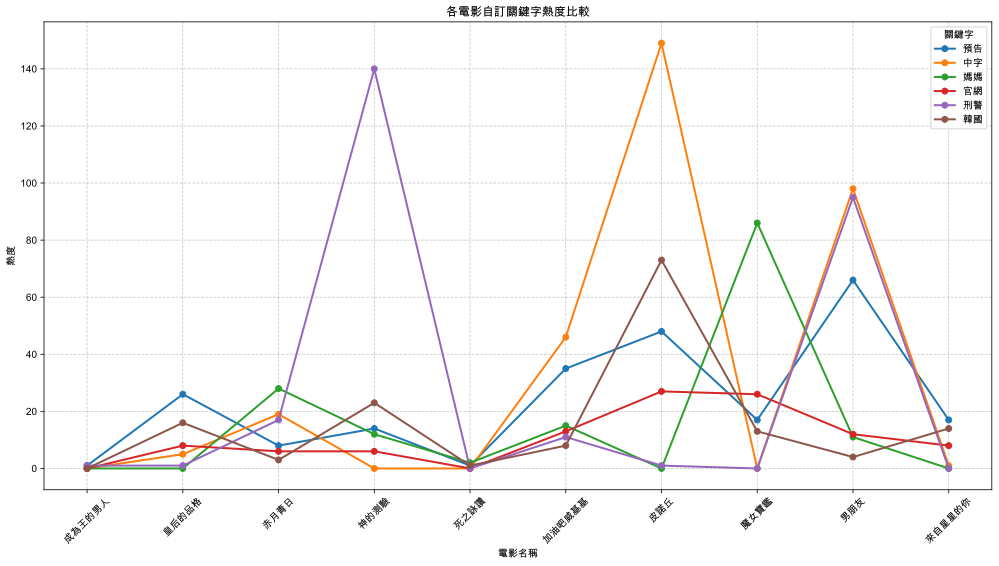

In [73]:
# 繪製折線圖
plt.figure(figsize=(14, 8))

for keyword in focus_keywords:
    plt.plot(
        movie_keywords_df_transposed.index,
        movie_keywords_df_transposed[keyword],
        marker="o",
        linewidth=2,
        label=keyword,
    )

plt.xlabel("電影名稱")
plt.ylabel("熱度")
plt.title("各電影自訂關鍵字熱度比較")
plt.xticks(rotation=45)
plt.legend(title="關鍵字", loc="best")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

 ### 熱力圖展示所有電影與關鍵字的關係

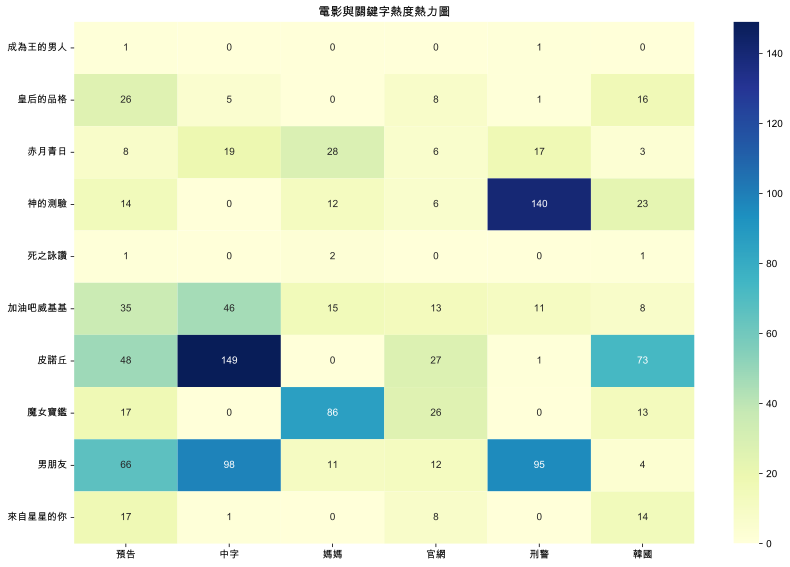

In [74]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(movie_keywords_df_transposed, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title("電影與關鍵字熱度熱力圖")
plt.tight_layout()
plt.show()